In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import shap
# sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Saving best model to variable
loaded_joblib=joblib.load('rf_reg_proj1.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [4]:
X_train_df=loaded_joblib['X_train']
y_train=loaded_joblib['y_train']
X_test_df=loaded_joblib['X_test']
y_test=loaded_joblib['y_test']
preprocessor=loaded_joblib['preprocessor']
loaded_model=loaded_joblib['RandomForest']

# Explaining our Best Model with SHAP

In [5]:
# Initializing js
shap.initjs()

### Calculating shap values

In [6]:
# Determining length
len(X_train_df)

6392

In [7]:
# Calculating values
X_shap=shap.sample(X_train_df,nsamples=len(X_train_df),random_state=42)
y_shap=y_train.loc[X_shap.index]
display(X_shap.head(),y_shap.head())

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,-0.712775,1.828109,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,-1.291052,0.603369,1.327849,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,1.813319,0.244541,0.136187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.004931,-0.952591,0.732018,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,-0.965484,-0.336460,0.493686,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

In [8]:
# Instantiating and fitting best model
rf_reg=RandomForestRegressor(max_depth=9, max_features='sqrt', n_estimators=7)
rf_reg.fit(X_train_df, y_train)
# Creating explainer
explainer=shap.Explainer(rf_reg)
explainer # checking explainer

In [9]:
# Providing training data
shap_values=explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

# Comparing Shap Summary Plots To Original Feature Importances

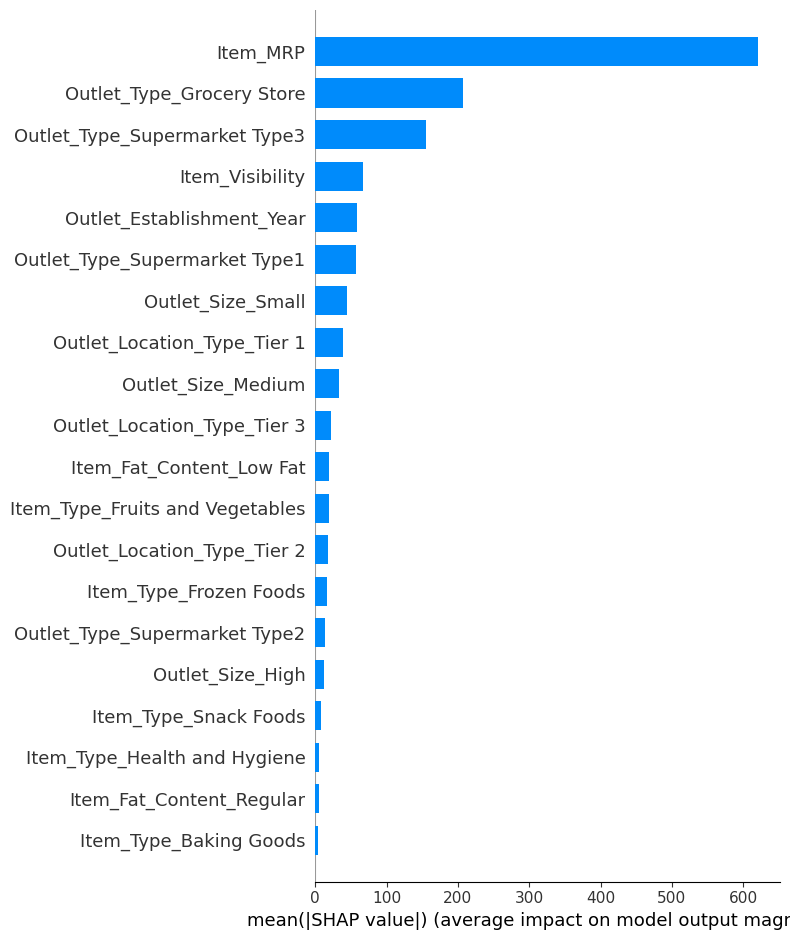

In [10]:
# Summary barplot 
shap.summary_plot(shap_values,features=X_shap,plot_type='bar')

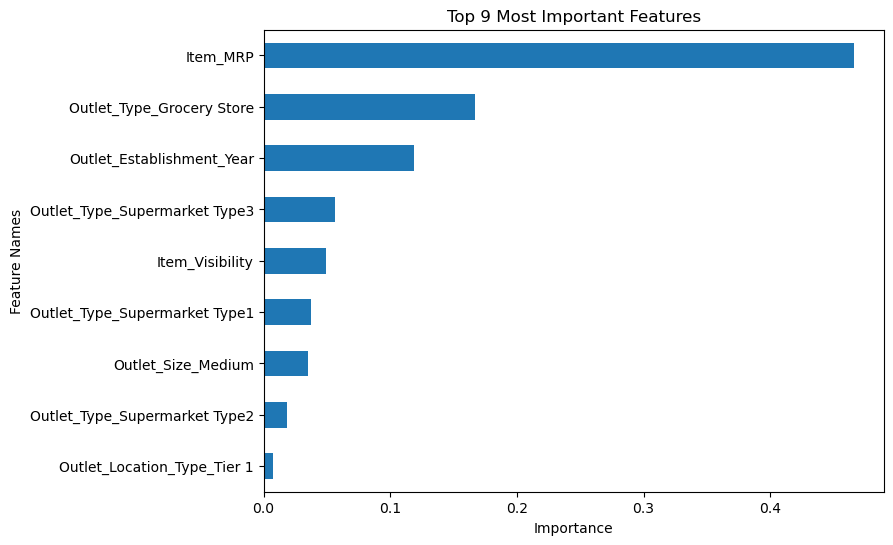

Our previously created feature importance plot shares the top 4 most important features with our new summary bar-plot. This doesn't quiet tell us any details on how the features positively or negatively influence our model's prediction.

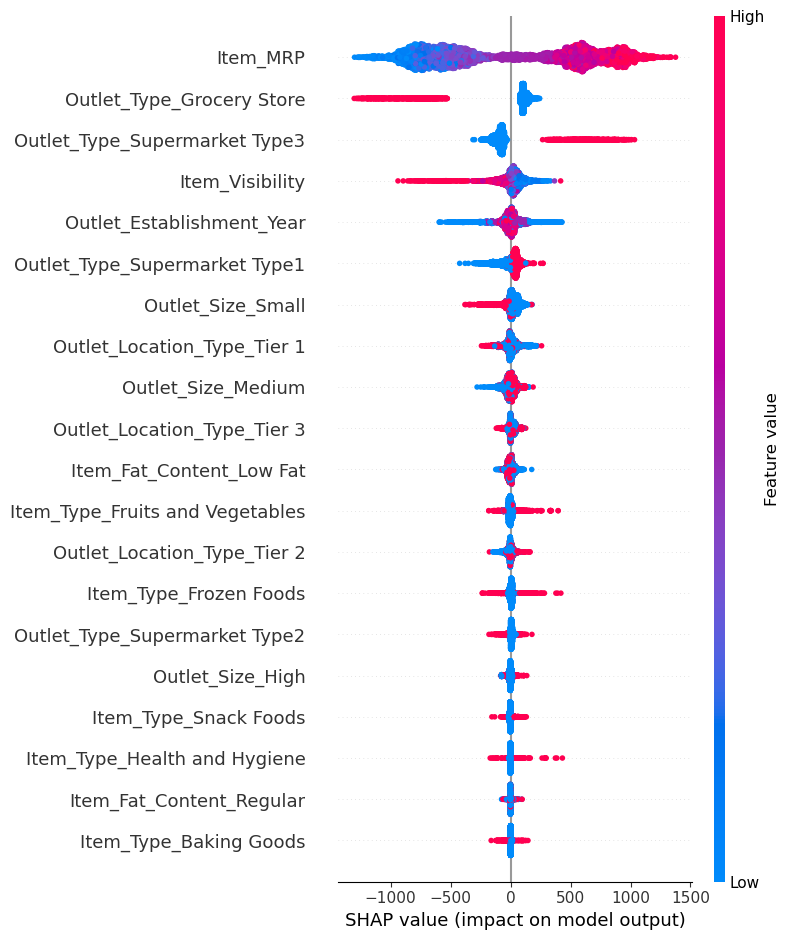

In [12]:
shap.summary_plot(shap_values,features=X_shap);

Item_MRP is shown to have the highest impact on model output with higher MRP equating to increased sales (and lower MRP having the opposite effect). The same case goes for instances of Supermarket Type 3. We see the opposite in the case of instances of Grocery Stores and increased Item_Visibility. The larger the values of those features, the lower the impact on sales.